In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
prompt24 = "Simulate oxygenated hemoglobin (1A3N) and deoxygenated hemoglobin (6BB5). Then analyze the RDF of both."
llm_var = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-07
time: 18:16:50
LLM:  accounts/fireworks/models/llama-v3p1-405b-instruct 
Temperature:  0.1


In [3]:
agent.run(prompt24)

Thought: First, I need to download the PDB files for oxygenated hemoglobin (1A3N) and deoxygenated hemoglobin (6BB5) to simulate them. Then, I will use the RDF tool to analyze the radial distribution function of both.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1A3N"
}
```
PDB file found with this ID: 1A3N
Now that I have the PDB file for oxygenated hemoglobin (1A3N), I need to download the PDB file for deoxygenated hemoglobin (6BB5).

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "6BB5"
}
```PDB file found with this ID: 6BB5
Now that I have the PDB files for both oxygenated hemoglobin (1A3N) and deoxygenated hemoglobin (6BB5), I need to simulate them using the SetUpandRunFunction tool.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1A3N_181653",
    "forcefield_files": ["amber99sbildn.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "Non

/scratch/qcampbe2/myenvs/mdagent/lib/python3.12/site-packages/mdtraj/geometry/rdf.py:103: RuntimeWarning: invalid value encountered in divide
  g_r = g_r.astype(np.float64) / norm  # From int64.


Thought: Now that the RDF of oxygenated hemoglobin (1A3N) has been analyzed, I need to analyze the RDF of deoxygenated hemoglobin (6BB5) using the RDFTool.

Action:
```
{
  "action": "RDFTool",
  "action_input": {
    "input": {
      "trajectory_fileid": "rec0_181843",
      "topology_fileid": "top_sim0_181843"
    }
  }
}
```

/scratch/qcampbe2/myenvs/mdagent/lib/python3.12/site-packages/mdtraj/geometry/rdf.py:103: RuntimeWarning: invalid value encountered in divide
  g_r = g_r.astype(np.float64) / norm  # From int64.


Thought: Now that the RDF of both oxygenated hemoglobin (1A3N) and deoxygenated hemoglobin (6BB5) have been analyzed, I can provide the final answer.

Action:
```
{
  "action": "Final Answer",
  "action_input": "The RDF analysis of oxygenated hemoglobin (1A3N) and deoxygenated hemoglobin (6BB5) has been completed. The RDF plots for both proteins are available as fig0_181929 and fig0_181931, respectively."
}
```

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

registry = agent.path_registry
print('ckpt_dir:',os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-09-07
time: 18:19:33
ckpt_dir: ckpt_108
Files found in registry: 1A3N_181653: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_181653
 6BB5_181654: PDB file downloaded from RSCB
 PDBFile ID: 6BB5_181654
 1A3N_181716: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_181719: Initial positions for simulation sim0_181719
 sim0_181719: Basic Simulation of Protein 1A3N_181716
 rec0_181720: Simulation trajectory for protein 1A3N_181716 and simulation sim0_181719
 rec1_181720: Simulation state log for protein 1A3N_181716 and simulation sim0_181719
 rec2_181720: Simulation pdb frames for protein 1A3N_181716 and simulation sim0_181719
 6BB5_181839: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_181843: Initial positions

In [5]:
import re
import os

matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_id2 = matches[1]
fig_path_1 = registry.get_mapped_path(fig_id1)
fig_path_2 = registry.get_mapped_path(fig_id2)

assert os.path.exists(fig_path_1)
assert os.path.exists(fig_path_2)
assert fig_path_1 != fig_path_2
print(f'It is asserted that file paths for {fig_id1} and {fig_id2} exist')

It is asserted that file paths for fig0_181929 and fig0_181931 exist


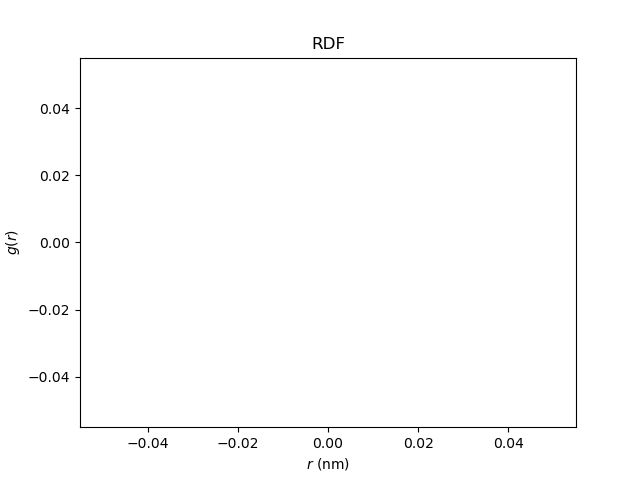

In [6]:
from IPython.display import Image
Image(filename=fig_path_1)

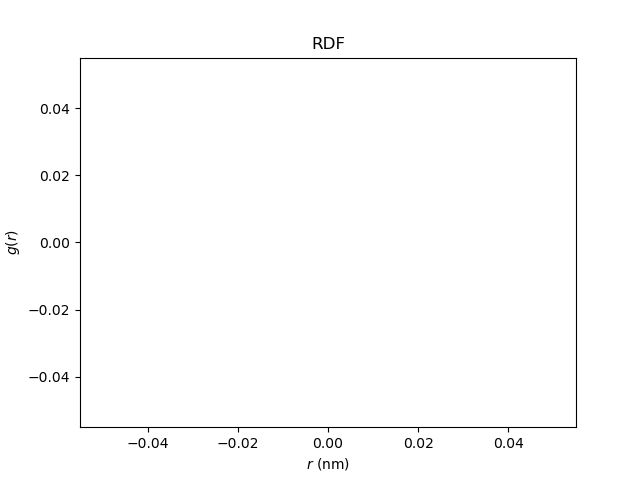

In [7]:
Image(filename=fig_path_2)

# Experiment Result: ✅❌

1. Completed without Exception or TimeOut Errors ✅
2. Attempted all necessary steps ✅
3. Completed without Hallucination ✅
4. Logic make sense ✅
5. Correct Answer ❌